In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC 

from sklearn.metrics import recall_score as recall, precision_score as precision, f1_score as f1, accuracy_score as accuracy

In [64]:
def loader():
    from sklearn.datasets import load_iris

    X, y = load_iris(return_X_y=True, as_frame=True)
    from sklearn.datasets import make_classification
    X, y = make_classification(random_state=42, n_features=2, n_samples=100, n_redundant=0, class_sep=2)
    y = np.where(y==1, 1, -1)
    ss = preprocessing.StandardScaler()
    X = ss.fit_transform(X)
    

    return train_test_split(X, y, test_size=0.20, random_state=42)

In [65]:
X_train, X_test, y_train, y_test = loader()

# SVM

In [49]:
from source.svm import SVM

## Линейное ядро

In [50]:
%%time
# вручную
svm = SVM(kernel='linear')
svm.fit(X_train, y_train)

pred = svm.predict(X_test)

print(f'Accuracy: {accuracy(y_test, pred)}')
print(f'precision: {precision(y_test, pred)}')
print(f'Recall: {recall(y_test, pred)}')
print(f'F1: {f1(y_test, pred)}')

Accuracy: 1.0
precision: 1.0
Recall: 1.0
F1: 1.0
CPU times: user 2.93 s, sys: 5.92 ms, total: 2.93 s
Wall time: 452 ms


In [51]:
%%time
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

pred = list(svm.predict(X_test))

print(f'Accuracy: {accuracy(y_test, pred)}')
print(f'precision: {precision(y_test, pred)}')
print(f'Recall: {recall(y_test, pred)}')
print(f'F1: {f1(y_test, pred)}')

Accuracy: 1.0
precision: 1.0
Recall: 1.0
F1: 1.0
CPU times: user 118 ms, sys: 991 μs, total: 119 ms
Wall time: 19.7 ms


## RBF

In [52]:
%%time
svm = SVM(kernel='rbf')
svm.fit(X_train, y_train)

pred = svm.predict(X_test)

print(f'Accuracy: {accuracy(y_test, pred)}')
print(f'precision: {precision(y_test, pred)}')
print(f'Recall: {recall(y_test, pred)}')
print(f'F1: {f1(y_test, pred)}')

Accuracy: 1.0
precision: 1.0
Recall: 1.0
F1: 1.0
CPU times: user 47.3 s, sys: 40 ms, total: 47.4 s
Wall time: 32.4 s


In [53]:
%%time
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

pred = list(svm.predict(X_test))

print(f'Accuracy: {accuracy(y_test, pred)}')
print(f'precision: {precision(y_test, pred)}')
print(f'Recall: {recall(y_test, pred)}')
print(f'F1: {f1(y_test, pred)}')

Accuracy: 1.0
precision: 1.0
Recall: 1.0
F1: 1.0
CPU times: user 56.8 ms, sys: 0 ns, total: 56.8 ms
Wall time: 7.98 ms


## Poly

In [54]:
%%time
svm = SVM(kernel='poly')
svm.fit(X_train, y_train)

pred = svm.predict(X_test)

print(f'Accuracy: {accuracy(y_test, pred)}')
print(f'precision: {precision(y_test, pred)}')
print(f'Recall: {recall(y_test, pred)}')
print(f'F1: {f1(y_test, pred)}')

Accuracy: 1.0
precision: 1.0
Recall: 1.0
F1: 1.0
CPU times: user 13.6 s, sys: 2.99 ms, total: 13.6 s
Wall time: 5.69 s


In [55]:
%%time
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)

pred = list(svm.predict(X_test))

print(f'Accuracy: {accuracy(y_test, pred)}')
print(f'precision: {precision(y_test, pred)}')
print(f'Recall: {recall(y_test, pred)}')
print(f'F1: {f1(y_test, pred)}')

Accuracy: 1.0
precision: 1.0
Recall: 1.0
F1: 1.0
CPU times: user 135 ms, sys: 1.99 ms, total: 137 ms
Wall time: 20.7 ms


In [66]:
def vis(X, y, svm):
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_reduced[y == 1, 0], X_reduced[y == 1, 1], color='blue', label='1', alpha=0.7)
    plt.scatter(X_reduced[y == -1, 0], X_reduced[y == -1, 1], color='red', label='-1', alpha=0.7)

    X_support_reduced = pca.transform(svm.support_vectors)
    plt.scatter(X_support_reduced[:, 0], X_support_reduced[:, 1], facecolors='none', edgecolors='k', s=100, label='Опорные вектора')

    plt.title('SVM')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [67]:
svm = SVM(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

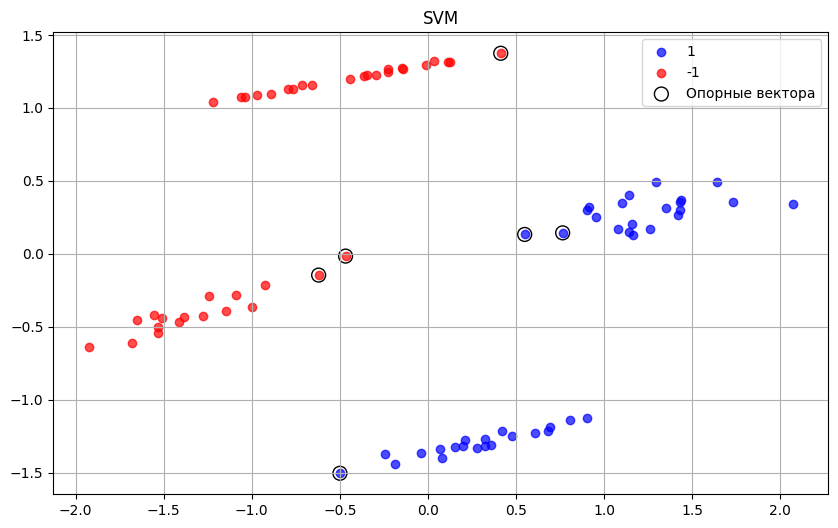

In [68]:
vis(X_train, y_train, svm)